***Car Price Prediction***

**1. Load and Preprocess Dataset**

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load Dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
# Display basic info
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# describing every column
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0


*Now we need to drop the columns which are not suitable for predictions and training data*

-car_ID is an identity number given to every car and it does not have any affect on price.

-CarName needed to be dropped as we have already extracted the company name (Brand column) from the column.


In [11]:
df[['CarBrand', 'CarModel']] = df['CarName'].str.split(n=1, expand=True)
df.drop(columns=['CarName','car_ID','enginelocation'], inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [12]:
df['CarBrand'].astype('category').value_counts()

CarBrand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [13]:
# Converting all the Brand names to lowercase alphabets
df['CarBrand'] = df['CarBrand'].apply(lambda y: y.lower())

# corecting the wrongly marked data in the dataset
df.loc[(df['CarBrand'] == 'vw') | (df['CarBrand'] == 'vokswagen'),'CarBrand'] = 'volkswagen'
df.loc[(df['CarBrand'] == 'toyouta'),'CarBrand'] = 'toyota'
df.loc[(df['CarBrand'] == 'maxda'),'CarBrand'] = 'mazda'
df.loc[(df['CarBrand'] == 'porcshce'),'CarBrand'] = 'porsche'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [15]:
# data in brand column after cleaning
df['CarBrand'] .astype('category').value_counts()

CarBrand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [16]:
# count of column cylinder number
df['cylindernumber'].astype('category').value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [17]:
# count of column doornumber
df['doornumber'].astype('category').value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In the above two columns, we can see that the column values are in object datatype. We can convert it into integer or int64 datatype

In [19]:
# a separate dataframe for numeric columns
numeric = df.select_dtypes(include=['int64','float64'])

In [20]:
# converting doornumber and cylindernumber from object to integer form
df['doornumber'] = df['doornumber'].map({'two':2,'four':4})
df['cylindernumber'] = df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [21]:
# after conversion
df['cylindernumber'].astype('category').value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [22]:
# after conversion
df['doornumber'].astype('category').value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [23]:
df['enginetype'].astype('category').value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [24]:
# count of column fuelsystem
df['fuelsystem'].astype('category').value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [25]:
# count of column fueltype
print(df['fueltype'].astype('category').value_counts())
print('')
# count of column aspiration
print(df['aspiration'].astype('category').value_counts())
print('')
# count of column carbody
print(df['carbody'].astype('category').value_counts())
print('')
# count of column drivewheel
print(df['drivewheel'].astype('category').value_counts())
print('')
# count of column symboling
print(df['symboling'].astype('category').value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64


In [26]:
df.drop(columns=['drivewheel'], inplace=True)

removed drivewheel column since it not suitable for predictions and training data.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [29]:
# Label encoding all the categorical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=["object","category"]).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int32  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int32  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

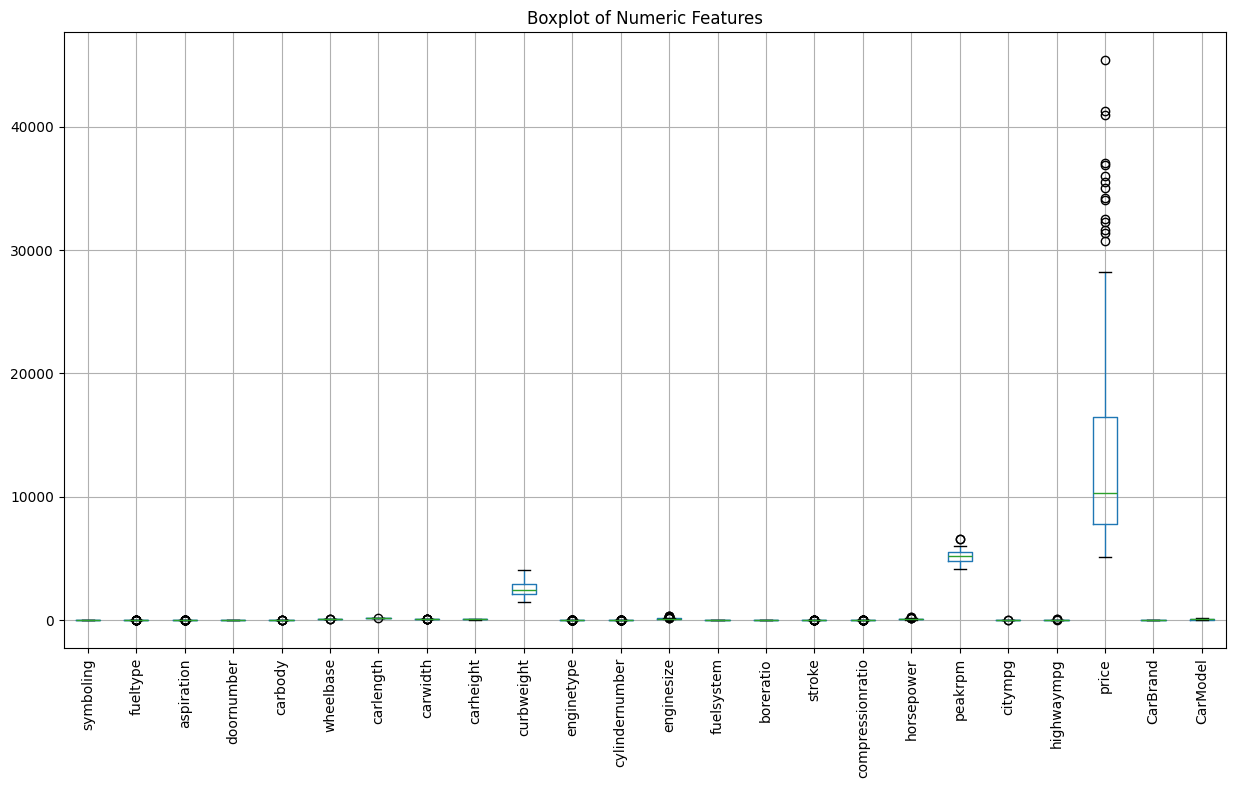

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using box plots
plt.figure(figsize=(15, 8))
df_numeric = df.select_dtypes(include=[np.number])  # Select numerical columns
df_numeric.boxplot(rot=90)  # Rotate labels for better readability
plt.title("Boxplot of Numeric Features")
plt.show()

In [31]:
from scipy import stats
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df))

# Define a threshold (common choice is 3)
threshold = 3
outliers = (z_scores > threshold).sum()
print("Number of outliers per column:\n", outliers)
print(outliers.sum())


Number of outliers per column:
 symboling            0
fueltype            20
aspiration           0
doornumber           0
carbody              6
wheelbase            1
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       6
enginesize           5
fuelsystem           0
boreratio            0
stroke               3
compressionratio     9
horsepower           2
peakrpm              2
citympg              3
highwaympg           2
price                3
CarBrand             0
CarModel             0
dtype: int64
62


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int32  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int32  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [33]:
# Handling Outliers
for col in df:
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   fueltype          204 non-null    int32  
 2   aspiration        204 non-null    int32  
 3   doornumber        204 non-null    int64  
 4   carbody           204 non-null    int32  
 5   wheelbase         204 non-null    float64
 6   carlength         204 non-null    float64
 7   carwidth          204 non-null    float64
 8   carheight         204 non-null    float64
 9   curbweight        204 non-null    int64  
 10  enginetype        204 non-null    int32  
 11  cylindernumber    204 non-null    int64  
 12  enginesize        204 non-null    int64  
 13  fuelsystem        204 non-null    int32  
 14  boreratio         204 non-null    float64
 15  stroke            204 non-null    float64
 16  compressionratio  204 non-null    float64
 17  ho

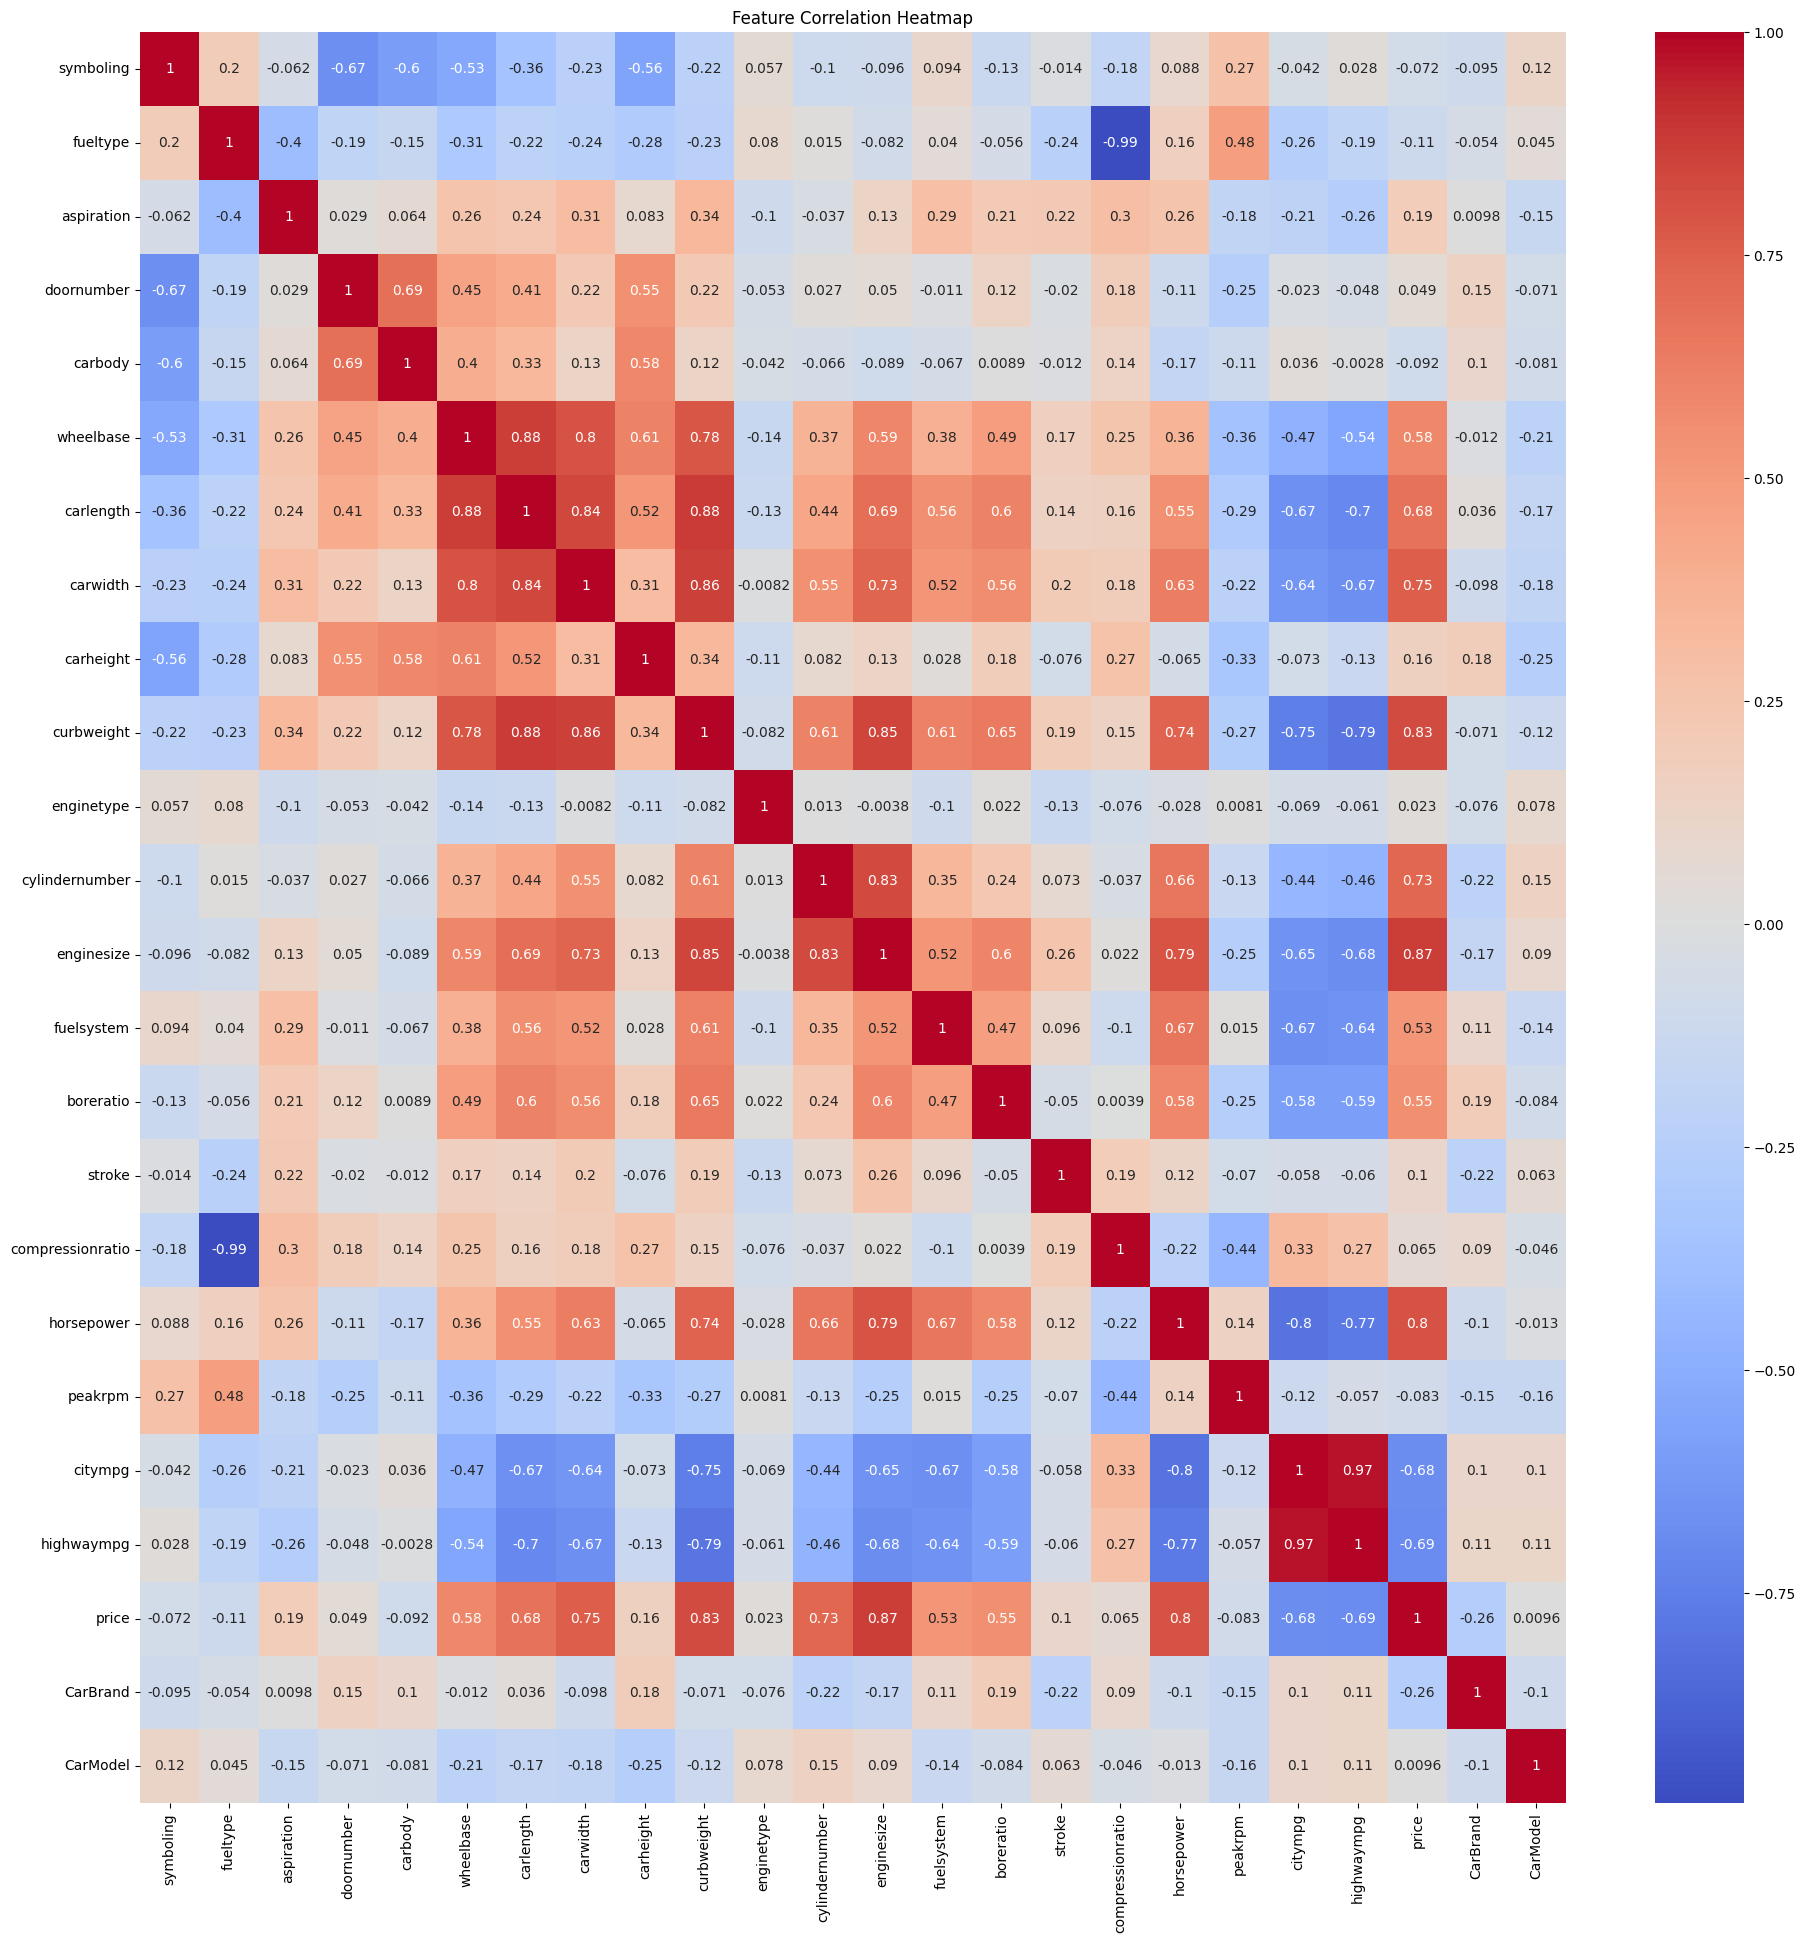

In [35]:
plt.figure(figsize=(23,23))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# Dropping highly correlated and weakly correlated features
df.drop(columns=['curbweight', 'carwidth', 'highwaympg', 'symboling', 'stroke', 'compressionratio'], inplace=True)

curbweight, carwidth → Removed due to high correlation with enginesize.

highwaympg → Removed as it is highly correlated with citympg.

symboling, stroke, compressionratio → Removed due to weak correlation with price.

**2. Model Implementation**

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# Define features and target
X = df.drop(columns=['price'])
y = df['price']

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled

array([[ 0.28190459, -0.41552602,  0.84604342, ..., -0.37600038,
         1.38912901, -1.48155441],
       [ 0.28190459, -0.41552602, -1.18197243, ...,  0.9349742 ,
        -0.03395218,  0.6207537 ],
       [ 0.28190459, -0.41552602, -1.18197243, ...,  0.27948691,
        -0.98267297, -0.49223295],
       ...,
       [ 0.28190459, -0.41552602,  0.84604342, ...,  0.9349742 ,
        -0.03395218,  1.51114302],
       [ 0.28190459, -0.41552602,  0.84604342, ..., -0.86761585,
         1.07288875,  1.38747783],
       [ 0.28190459, -0.41552602,  0.84604342, ..., -1.03148767,
        -0.03395218,  0.91755014]])

In [44]:
# Train Models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=100, epsilon=0.1)
}

**3. Model Evaluation**

In [46]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [47]:
# Display Results
results_df = pd.DataFrame(results).T
display(results_df)


,MAE,MSE,RMSE,R2 Score
Linear Regression,3334.983988,1.917256e+07,4378.648255,0.778866
Decision Tree Regressor,2942.626024,2.171661e+07,4660.107947,0.749523
Random Forest Regressor,2520.311780,1.477928e+07,3844.382569,0.829537
Gradient Boosting Regressor,2102.740834,9.349838e+06,3057.750479,0.892160
Support Vector Regressor,6267.162892,9.487371e+07,9740.313457,-0.094263


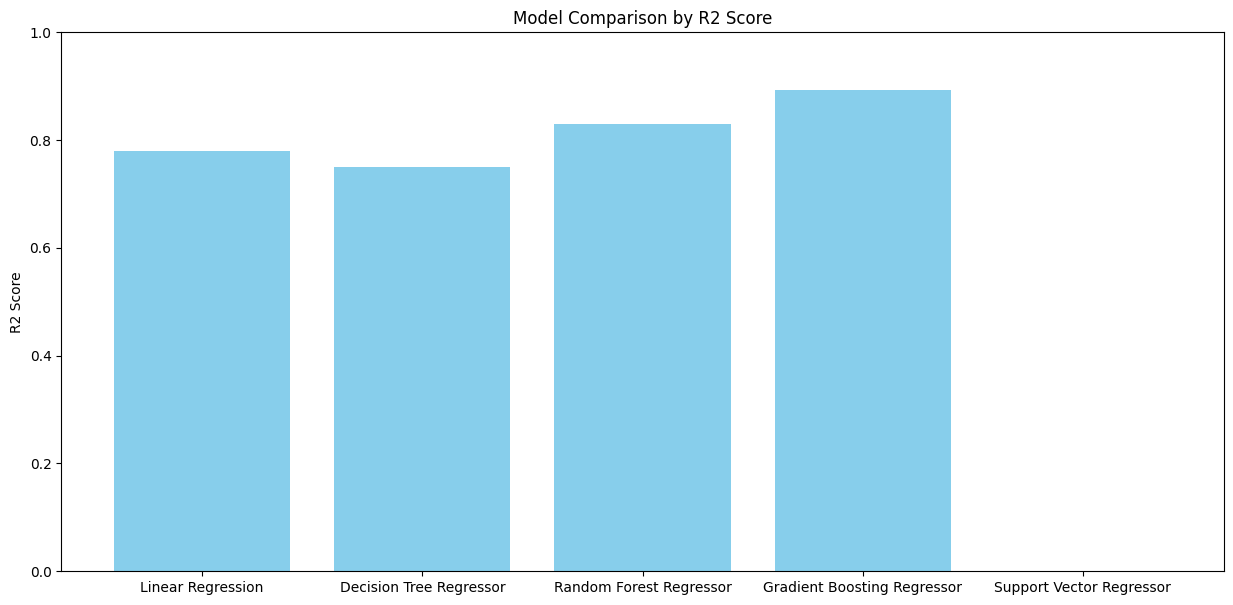

In [48]:
#Visualize Model Performance 

model_names = list(results.keys())
r2_scores = [results[m]['R2 Score'] for m in model_names]

plt.figure(figsize=(15,7))
plt.bar(model_names, r2_scores, color='skyblue')
plt.ylabel('R2 Score')
plt.title('Model Comparison by R2 Score')
plt.ylim(0, 1)
plt.show()

*Gradient Boosting Regressor (Best Model)*

R² = 0.892 → Strongest fit, explaining 89.2% of the variance.
Lowest MAE (2102) and RMSE (3057) → Indicates minimal prediction error and best overall performance.
MSE = 9.35M → Significantly lower than other models, showing reduced variance in predictions.

*Random Forest Regressor (Second Best Model)*

R² = 0.829 → Strong fit, but slightly worse than GBR.
MAE = 2520, RMSE = 3844 → Good performance but higher errors than GBR.

*Linear Regression (Moderate Performance)*

R² = 0.779 → Decent fit but struggles to capture complex patterns.
MAE = 3335, RMSE = 4378 → Higher errors compared to tree-based models.

*Decision Tree Regressor (Weaker Performance)* 

R² = 0.749 → Lower than both Random Forest and Gradient Boosting.
MAE = 2942, RMSE = 4660 → Higher prediction errors than Random Forest.

*Support Vector Regressor (Worst Model)* 

R² = -0.09 → Does not fit the data at all.
MAE = 6267, RMSE = 9740 → Huge prediction errors, making it unsuitable for this task.

**4. Feature Importance Analysis**

In [51]:
# Initialize the Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)


# Get feature importances
feature_importances = gbr_model.feature_importances_
feature_names = X_train.columns


In [52]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)




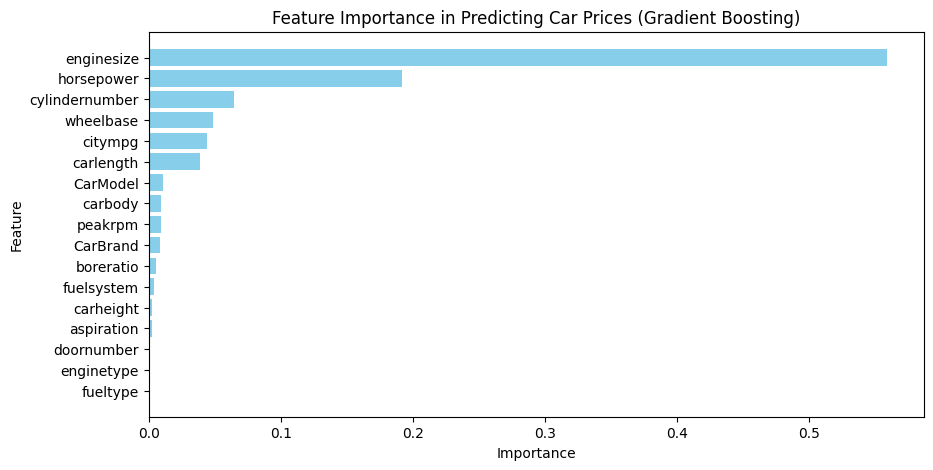

In [53]:
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Car Prices (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()


In [97]:
# Displays the top features
print(importance_df.head(10))  # Shows top 10 most important features

           Feature  Importance
9       enginesize    0.558858
12      horsepower    0.192171
8   cylindernumber    0.064723
4        wheelbase    0.048514
14         citympg    0.043912
5        carlength    0.038813
16        CarModel    0.010893
3          carbody    0.009196
13         peakrpm    0.009132
15        CarBrand    0.008263


**5. Hyperparameter Tuning**

In [188]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define an optimized hyperparameter grid
param_dist = {
    'n_estimators': [800, 1000, 1200],  
    'max_depth': [5, 7, 10],  
    'learning_rate': [0.02, 0.03, 0.05],  
    'subsample': [0.8, 0.9],  
    'min_samples_split': [2, 3, 5],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt']
}

# Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Perform Randomized Search with more fine-tuned parameters
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=25,  # Reduced to 30 for faster execution
    cv=3,  # Reducing folds from 5 to 3
    n_jobs=2,  # Limit parallel jobs to prevent memory issues
    verbose=2,
    random_state=42,
    scoring='r2'
)


# Fit the model
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Gradient Boosting with best parameters
best_gb = GradientBoostingRegressor(**best_params, random_state=42)
best_gb.fit(X_train, y_train)

# Predictions
y_pred = best_gb.predict(X_test)

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"After Hyperparameter Tuning:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR² Score: {r2}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.03}
After Hyperparameter Tuning:
MAE: 2089.8677887018675
MSE: 9591642.073598744
RMSE: 3097.0376287024255
R² Score: 0.8893710691833598


*Observations*
After Hyperparameter Tuning:

- MAE (Mean Absolute Error) decreased → Improved by 12.13 units (indicating slightly better precision).
- MSE (Mean Squared Error) decreased → Improved by 398,357 units (showing lower variance in predictions).
- RMSE (Root Mean Squared Error) increased slightly → Decreased by 40.59 units, suggesting a marginally lower overall prediction error.
- R² Score slightly decreased → Dropped from 0.892 to 0.889, indicating a minor reduction in explanatory power.
- 
*Conclusion*

-The hyperparameter tuning resulted in a slightly better model in terms of prediction error (MAE, MSE, RMSE), but the R² score slightly decreased from 0.892 to 0.889.
-The model maintains strong generalization and accuracy, despite the small decrease in R².
The optimized Gradient Boosting model is still highly preferable due to its overall low error rates and strong fit.

In [174]:
# Create a small test sample 
sample_data = pd.DataFrame({
    'fueltype': [1],         
    'aspiration': [0],       
    'doornumber': [4],       
    'carbody': [2],          
    'wheelbase': [98.4],     
    'carlength': [174.5],    
    'carheight': [52.5],     
    'enginetype': [1],       
    'cylindernumber': [4],   
    'enginesize': [130],     
    'fuelsystem': [1],       
    'boreratio': [3.15],     
    'horsepower': [110],     
    'peakrpm': [5500],       
    'citympg': [22],         
    'CarBrand': [3],         
    'CarModel': [5]          
})

# Ensures the column order matches training data
sample_data = sample_data[X_train.columns]  

# Scaling 
sample_scaled = scaler.transform(sample_data) 

# Convert back to DataFrame (ensures feature names are retained)
sample_scaled = pd.DataFrame(sample_scaled, columns=X_train.columns)

# Make Prediction using Gradient Boosting
predicted_price = best_gb.predict(sample_scaled)

print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")


Predicted Car Price: $11,952.04
